In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Spam_classification.csv')

In [ ]:
df.sample(5)

,label,origin
31822,0,Received: from iceman.cc.utexas.edu (iceman.cc...
25751,0,Received: from sirius.mrc-cbu.cam.ac.uk (siriu...
4105,0,Received: from paw.montana.com (paw.montana.co...
30856,1,Received: from 24.175.6.52 (cpe-24-175-6-52.ho...
25390,0,Received: from argyle.richmond.edu (argyle.ric...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37822 entries, 0 to 37821
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   37822 non-null  int64 
 1   origin  37822 non-null  object
dtypes: int64(1), object(1)
memory usage: 591.1+ KB


In [ ]:
df.rename(columns={'label':'target','origin':'text'},inplace=True)
df.sample(5)

,target,text
6077,0,Received: from ml.media.mit.edu (ml.media.mit....
7702,1,Received: from SENDER-103 (unknown [222.172.13...
4748,1,Received: from 60.209.139.58 (unknown [60.209....
8279,1,Received: from wpc0051.host7x24.com (wpc0051.h...
12179,1,Received: from 3E1F380 (201-26-61-213.dsl.tele...


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

33

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(37789, 2)

In [ ]:
df['target'].value_counts()

1    24897
0    12892
Name: target, dtype: int64

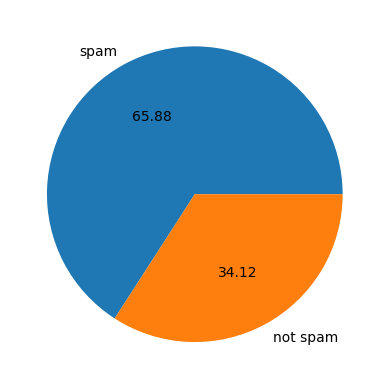

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['spam','not spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,Received: from rodan.UU.NET by aramis.rutgers....,3656
1,1,Received: from unknown (HELO groucho.cs.psu.ed...,2135
2,1,Received: \n\tfrom 24-151-178-89.dhcp.kgpt.tn....,1405
3,0,Received: from psuvax1.cs.psu.edu ([130.203.2....,1408
4,1,Received: from 201-1-198-159.dsl.telesp.net.br...,3042


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,Received: from rodan.UU.NET by aramis.rutgers....,3656,704
1,1,Received: from unknown (HELO groucho.cs.psu.ed...,2135,229
2,1,Received: \n\tfrom 24-151-178-89.dhcp.kgpt.tn....,1405,243
3,0,Received: from psuvax1.cs.psu.edu ([130.203.2....,1408,295
4,1,Received: from 201-1-198-159.dsl.telesp.net.br...,3042,704


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Received: from rodan.UU.NET by aramis.rutgers....,3656,704,27
1,1,Received: from unknown (HELO groucho.cs.psu.ed...,2135,229,3
2,1,Received: \n\tfrom 24-151-178-89.dhcp.kgpt.tn....,1405,243,15
3,0,Received: from psuvax1.cs.psu.edu ([130.203.2....,1408,295,3
4,1,Received: from 201-1-198-159.dsl.telesp.net.br...,3042,704,3


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3.778900e+04,37789.000000,37789.000000
mean,5.003044e+03,878.970865,13.731906
std,5.467945e+04,4714.821211,119.231264
min,1.130000e+02,19.000000,1.000000
25%,1.475000e+03,254.000000,3.000000
50%,2.331000e+03,471.000000,7.000000
75%,3.731000e+03,804.000000,13.000000
max,7.841561e+06,569758.000000,11905.000000


In [ ]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1.289200e+04,12892.000000,12892.000000
mean,7.497330e+03,905.756516,19.951132
std,9.310818e+04,7915.977165,202.516453
min,1.130000e+02,19.000000,1.000000
25%,1.477000e+03,270.000000,5.000000
50%,2.141500e+03,390.000000,9.000000
75%,3.325000e+03,628.000000,15.000000
max,7.841561e+06,569758.000000,11905.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,24897.000000,24897.000000,24897.000000
mean,3711.469012,865.100896,10.511507
std,6660.985418,1137.462883,17.636088
min,505.000000,82.000000,1.000000
25%,1475.000000,243.000000,2.000000
50%,2422.000000,504.000000,5.000000
75%,3870.000000,963.000000,11.000000
max,299051.000000,13262.000000,226.000000


In [ ]:
import seaborn as sns

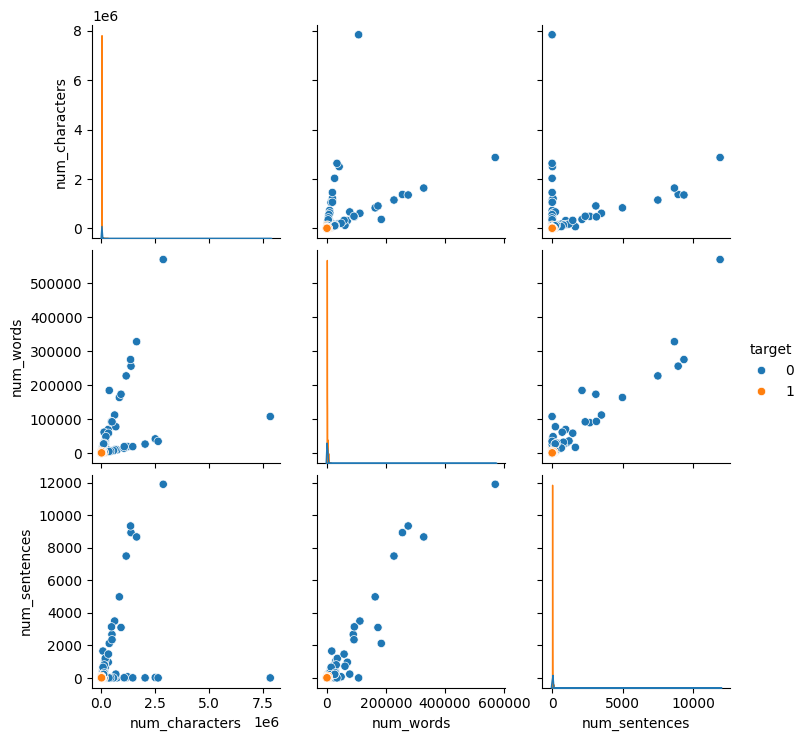

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-32-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

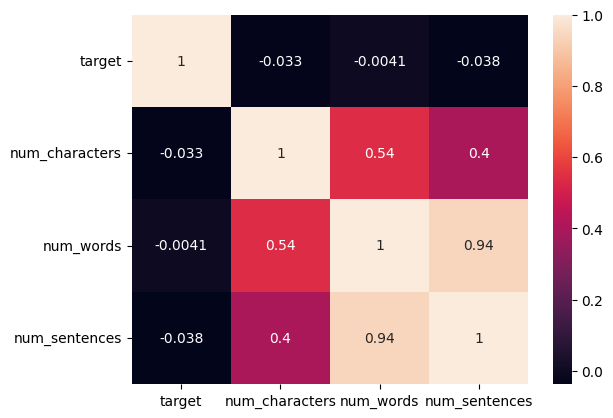

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
df['text'][10]

"Received: from psuvax1.cs.psu.edu ([130.203.2.4]) by groucho.cs.psu.edu with SMTP id <2580>; Wed, 14 Apr 1993 20:27:46 -0400\nReceived: from groucho.cs.psu.edu ([130.203.2.10]) by psuvax1.cs.psu.edu with SMTP id <292656>; Wed, 14 Apr 1993 20:22:53 -0400\nReceived: from localhost by groucho.cs.psu.edu with SMTP id <2580>; Wed, 14 Apr 1993 20:19:31 -0400\nTo: 9fans@cs.psu.edu\nSubject: mass ack\nDate: Wed, 14 Apr 1993 20:18:50 -0400\nFrom: Scott Schwartz <schwartz@groucho.cs.psu.edu>\nMessage-Id: <93Apr14.201931edt.2580@groucho.cs.psu.edu>\n\nGreetings all.  This is a mass acknowledgement to everyone who has\nsigned on to the plan9-fans list to date, now that influx has slowed\ndown a bit.  (There are 75 people on the list right now.)\n\nOne person has suggested that the name of the list be changed to\n9fans.  There's already an alias for that, in any event.\n\nThe list is not being archived (that I know of).  If someone wants to\ndo it, that would be great.\n\n-- Scott\n\n"

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Received: from rodan.UU.NET by aramis.rutgers....,3656,704,27,receiv id aa23563 mon 27 jul 92 edt receiv smt...
1,1,Received: from unknown (HELO groucho.cs.psu.ed...,2135,229,3,receiv unknown helo smtp id 2533 sat 3 apr 199...
2,1,Received: \n\tfrom 24-151-178-89.dhcp.kgpt.tn....,1405,243,15,receiv helo smtp id 2575 wed 7 apr 1993 002801...
3,0,Received: from psuvax1.cs.psu.edu ([130.203.2....,1408,295,3,receiv smtp id 2539 fri 9 apr 1993 receiv smtp...
4,1,Received: from 201-1-198-159.dsl.telesp.net.br...,3042,704,3,receiv helo 32a3f2f0 smtp id 2577 sat 10 apr 1...


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

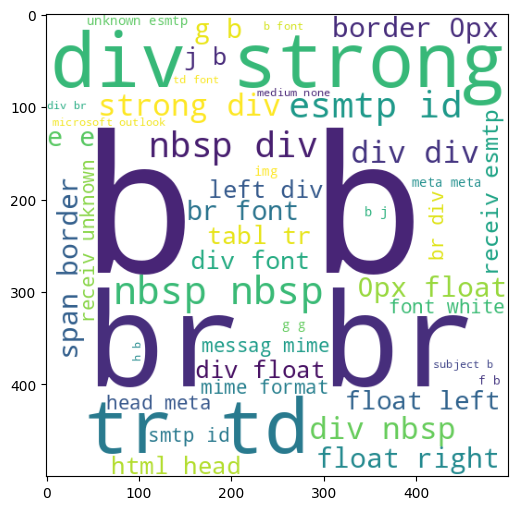

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

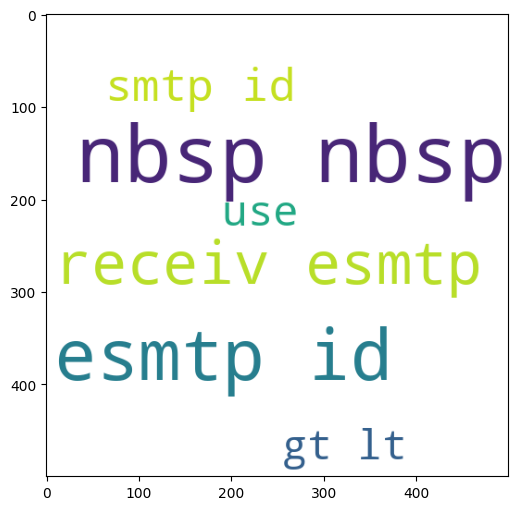

In [49]:
not_scam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(not_scam_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Received: from rodan.UU.NET by aramis.rutgers....,3656,704,27,receiv id aa23563 mon 27 jul 92 edt receiv smt...
1,1,Received: from unknown (HELO groucho.cs.psu.ed...,2135,229,3,receiv unknown helo smtp id 2533 sat 3 apr 199...
2,1,Received: \n\tfrom 24-151-178-89.dhcp.kgpt.tn....,1405,243,15,receiv helo smtp id 2575 wed 7 apr 1993 002801...
3,0,Received: from psuvax1.cs.psu.edu ([130.203.2....,1408,295,3,receiv smtp id 2539 fri 9 apr 1993 receiv smtp...
4,1,Received: from 201-1-198-159.dsl.telesp.net.br...,3042,704,3,receiv helo 32a3f2f0 smtp id 2577 sat 10 apr 1...


In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

5462070

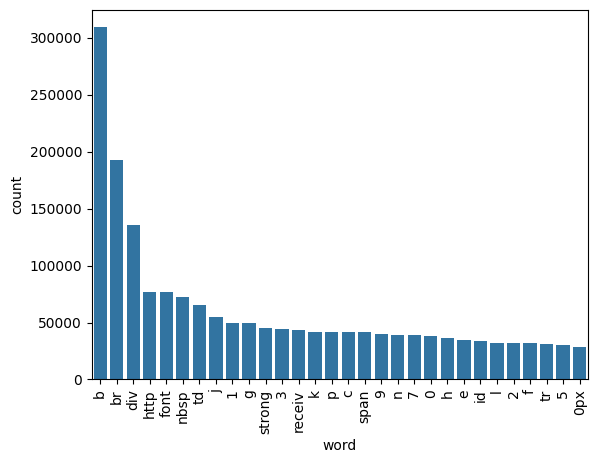

In [54]:
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)
df_graph = pd.DataFrame(word_counts, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df_graph)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

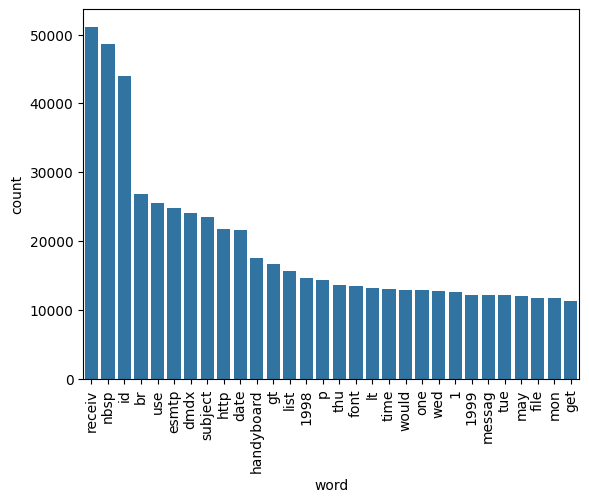

In [56]:
word_counts = Counter(ham_corpus).most_common(30)
df_graph = pd.DataFrame(word_counts, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df_graph)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
X.shape

(37789, 3000)

In [60]:
y = df['target'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9589838581635354
[[2510   23]
 [ 287 4738]]
0.9951690821256038


In [66]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9786980682720297
[[2475   58]
 [ 103 4922]]
0.9883534136546185


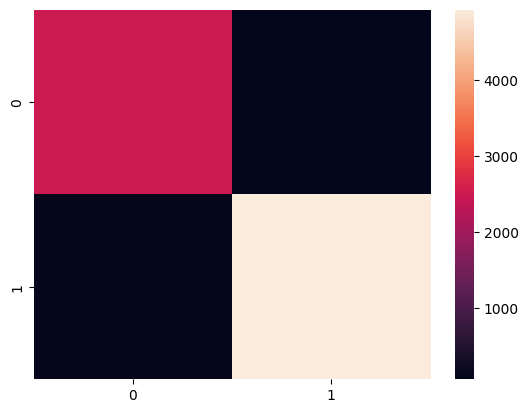

In [67]:
sns.heatmap(confusion_matrix(y_test,y_pred2))
plt.show()

In [68]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9525006615506748
[[2407  126]
 [ 233 4792]]
0.9743798291988613


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [71]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [73]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.980815030431331, 0.9845115170770453)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.980815030431331
Precision -  0.9845115170770453
For  KN
Accuracy -  0.9454882243979889
Precision -  0.9336341417559691
For  NB
Accuracy -  0.9786980682720297
Precision -  0.9883534136546185
For  DT
Accuracy -  0.9153215136279439
Precision -  0.9092775807354863
For  LR
Accuracy -  0.9892828790685366
Precision -  0.9920382165605095
For  RF
Accuracy -  0.9929875628473142
Precision -  0.9960095770151636
For  AdaBoost
Accuracy -  0.9723471817941254
Precision -  0.9770206022187005
